In [1]:
# Jupyter magic
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt  # standard Python plotting library

# import the tdt library
import tdt
import pandas as pd

In [2]:
# Must read with "/" not "\
NAc_PATH = 'C:/Users/yongc/Desktop/Exp 2 - 03032024 Social Defeat 2/dLight_mPFC-240303-090741'
NAc_data = tdt.read_block(NAc_PATH)

Found Synapse note file: C:/Users/yongc/Desktop/Exp 2 - 03032024 Social Defeat 2/dLight_mPFC-240303-090741\Notes.txt
read from t=0s to t=491.74s


## Basic Plotting

In [7]:
NAc_data.streams._465A.data.length()

AttributeError: 'numpy.ndarray' object has no attribute 'length'

In [3]:
#Jupyter has a bug that requires import of matplotlib outside of cell with matplotlib inline magic to properly apply rcParams

import matplotlib
%matplotlib inline
matplotlib.rcParams['font.size'] = 18 # set font size for all figures

# Make some variables up here to so if they change in new recordings you won't have to change everything downstream
ISOS = '_405A' # 405nm channel.
DA = '_465A'

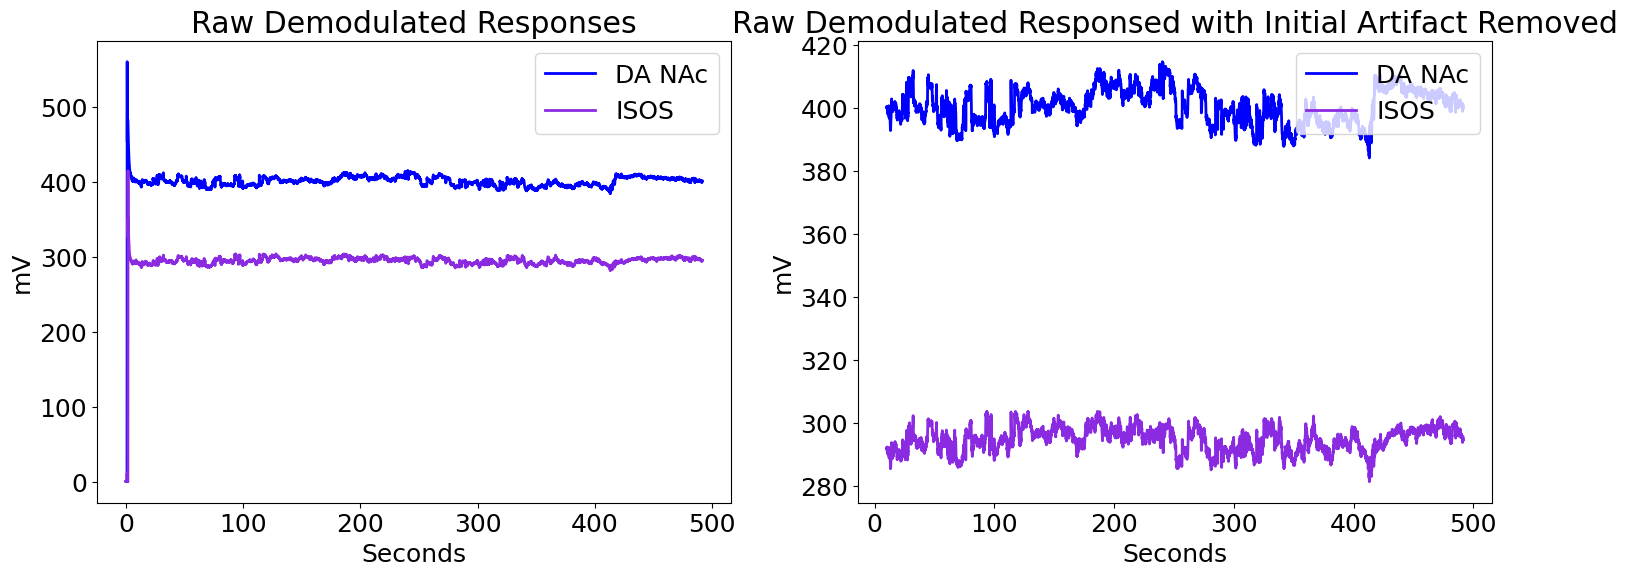

In [4]:
# Make a time array based on the number of samples and sample freq of the demodulated streams
NAc_time = np.linspace(1,len(NAc_data.streams[DA].data), len(NAc_data.streams[DA].data))/NAc_data.streams[DA].fs

# Plot both unprocessed demodulated stream            
fig1 = plt.figure(figsize=(18,6))
ax0 = fig1.add_subplot(121)

# Plotting the traces
p1, = ax0.plot(NAc_time, NAc_data.streams[DA].data, linewidth=2, color='blue', label='DA NAc')
p2, = ax0.plot(NAc_time, NAc_data.streams[ISOS].data, linewidth=2, color='blueviolet', label='ISOS')

ax0.set_ylabel('mV')
ax0.set_xlabel('Seconds')
ax0.set_title('Raw Demodulated Responses')
ax0.legend(handles=[p1,p2], loc='upper right')

# There is often a large artifact on the onset of LEDs turning on
# Remove data below a set time t
t = 10
inds = np.where(NAc_time>t)
ind = inds[0][0]
NAc_time = NAc_time[ind:] # go from ind to final index
NAc_data.streams[DA].data = NAc_data.streams[DA].data[ind:]
NAc_data.streams[ISOS].data = NAc_data.streams[ISOS].data[ind:]

# Plot again at new time range
ax1 = fig1.add_subplot(122)

# Plotting the traces
p1, = ax1.plot(NAc_time,NAc_data.streams[DA].data, linewidth=2, color='blue', label='DA NAc')
p2, = ax1.plot(NAc_time,NAc_data.streams[ISOS].data, linewidth=2, color='blueviolet', label='ISOS')

ax1.set_ylabel('mV')
ax1.set_xlabel('Seconds')
ax1.set_title('Raw Demodulated Responsed with Initial Artifact Removed')
ax1.legend(handles=[p1,p2],loc='upper right')

## Converting Boris Data to Epocs

In [5]:
csv_path = r"C:\Users\yongc\Desktop\Exp 2 - 03032024 Social Defeat 2\Adjusted Videos\dLight_mPFC-240303-085020.csv"
bout_df = pd.read_csv(csv_path)

In [6]:
bout_df.head()

,Observation id,Observation date,Description,Observation duration,Observation type,Source,Media duration (s),FPS,Subject,Behavior,Behavioral category,Behavior type,Time,Media file name,Image index,Image file path,Comment
0,dLight_mPFC-240303,2024-03-04 09:20:38,NaN,248.474,Media file(s),player #1:C:/Users/yongc/Desktop/Exp 2 - 03032...,503.627,17.37,subject,face sniffing,NaN,START,215.026,C:/Users/yongc/Desktop/Exp 2 - 03032024 Social...,3736,NaN,NaN
1,dLight_mPFC-240303,2024-03-04 09:20:38,NaN,248.474,Media file(s),player #1:C:/Users/yongc/Desktop/Exp 2 - 03032...,503.627,17.37,subject,face sniffing,NaN,STOP,215.659,C:/Users/yongc/Desktop/Exp 2 - 03032024 Social...,3747,NaN,NaN
2,dLight_mPFC-240303,2024-03-04 09:20:38,NaN,248.474,Media file(s),player #1:C:/Users/yongc/Desktop/Exp 2 - 03032...,503.627,17.37,subject,chased,NaN,START,235.348,C:/Users/yongc/Desktop/Exp 2 - 03032024 Social...,4089,NaN,NaN
3,dLight_mPFC-240303,2024-03-04 09:20:38,NaN,248.474,Media file(s),player #1:C:/Users/yongc/Desktop/Exp 2 - 03032...,503.627,17.37,subject,chased,NaN,STOP,238.745,C:/Users/yongc/Desktop/Exp 2 - 03032024 Social...,4148,NaN,NaN
4,dLight_mPFC-240303,2024-03-04 09:20:38,NaN,248.474,Media file(s),player #1:C:/Users/yongc/Desktop/Exp 2 - 03032...,503.627,17.37,subject,fought,NaN,START,238.745,C:/Users/yongc/Desktop/Exp 2 - 03032024 Social...,4148,NaN,NaN


f = Fought, 
c = chased
fc = fought/chased

In [7]:
FC_onset = []
FC_offset = []

In [8]:
FC_onset_values = bout_df[((bout_df['Behavior'] == 'fought') | (bout_df['Behavior'] == 'chased')) & (bout_df['Behavior type'] == 'START')]['Time'].values
FC_onset = FC_onset_values.tolist()

FC_offset_values = bout_df[((bout_df['Behavior'] == 'fought') | (bout_df['Behavior'] == 'chased')) & (bout_df['Behavior type'] == 'STOP')]['Time'].values
FC_offset = FC_offset_values.tolist()

print(FC_onset)
print(FC_offset)

[235.348, 238.745, 243.293, 245.826, 286.126, 396.143, 422.28]
[238.745, 240.76, 245.826, 248.071, 288.601, 397.524, 433.391]


In [9]:
FC_EVENT = 'FC_EVENT'
data_arr = []
for i in range(len(FC_onset)):
    data_arr.append(1)

FC_DICT = {
        "name":FC_EVENT,
        "onset":FC_onset,
        "offset":FC_offset,
        "type_str":NAc_data.epocs.Cam1.type_str,
        "data":data_arr
        }

NAc_data.epocs.FC_EVENT = tdt.StructType(FC_DICT)
FC_EVENT_on = NAc_data.epocs[FC_EVENT].onset
FC_EVENT_off = NAc_data.epocs[FC_EVENT].offset


In [10]:
len(FC_EVENT_on)

7

## Downsample Data Doing Local Averaging

In [11]:
# Average around every Nth point and downsample Nx
N = 10 # Average every 10 samples into 1 value
F405 = []
F465 = []
for i in range(0, len(NAc_data.streams[DA].data), N):
    F465.append(np.mean(NAc_data.streams[DA].data[i:i+N-1])) # This is the moving window mean
NAc_data.streams[DA].data = F465

for i in range(0, len(NAc_data.streams[ISOS].data), N):
    F405.append(np.mean(NAc_data.streams[ISOS].data[i:i+N-1]))
NAc_data.streams[ISOS].data = F405

#decimate time array to match length of demodulated stream
NAc_time = NAc_time[::N] # go from beginning to end of array in steps on N
NAc_time = NAc_time[:len(NAc_data.streams[DA].data)]

# Detrending and dFF
# Full trace dFF according to Lerner et al. 2015
# https://dx.doi.org/10.1016/j.cell.2015.07.014
# dFF using 405 fit as baseline

x = np.array(NAc_data.streams[ISOS].data)
y = np.array(NAc_data.streams[DA].data)
bls = np.polyfit(x, y, 1)
Y_fit_all = np.multiply(bls[0], x) + bls[1]
Y_dFC_all = y - Y_fit_all

dFF = np.multiply(100, np.divide(Y_dFC_all, Y_fit_all))
std_dFF = np.std(dFF)

In [12]:
# Add the first and last time stamps to make tails on the TTL stream
FC_EVENT_x = np.append(NAc_time[0], np.append(
    np.reshape(np.kron([FC_EVENT_on, FC_EVENT_off],np.array([[1], [1]])).T, [1,-1])[0], NAc_time[-1]))
sz = len(FC_EVENT_on)
d = NAc_data.epocs[FC_EVENT].data
# Add zeros to beginning and end of 0,1 value array to match len of FC_x
FC_EVENT_y = np.append(np.append(
    0, np.reshape(np.vstack([np.zeros(sz), d, d, np.zeros(sz)]).T, [1 ,-1])[0]), 0)

In [13]:
print(FC_EVENT_x)
print(FC_EVENT_y)

[ 10.00046572 235.348      235.348      238.745      238.745
 238.745      238.745      240.76       240.76       243.293
 243.293      245.826      245.826      245.826      245.826
 248.071      248.071      286.126      286.126      288.601
 288.601      396.143      396.143      397.524      397.524
 422.28       422.28       433.391      433.391      491.61141289]
[0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1.
 0. 0. 1. 1. 0. 0.]


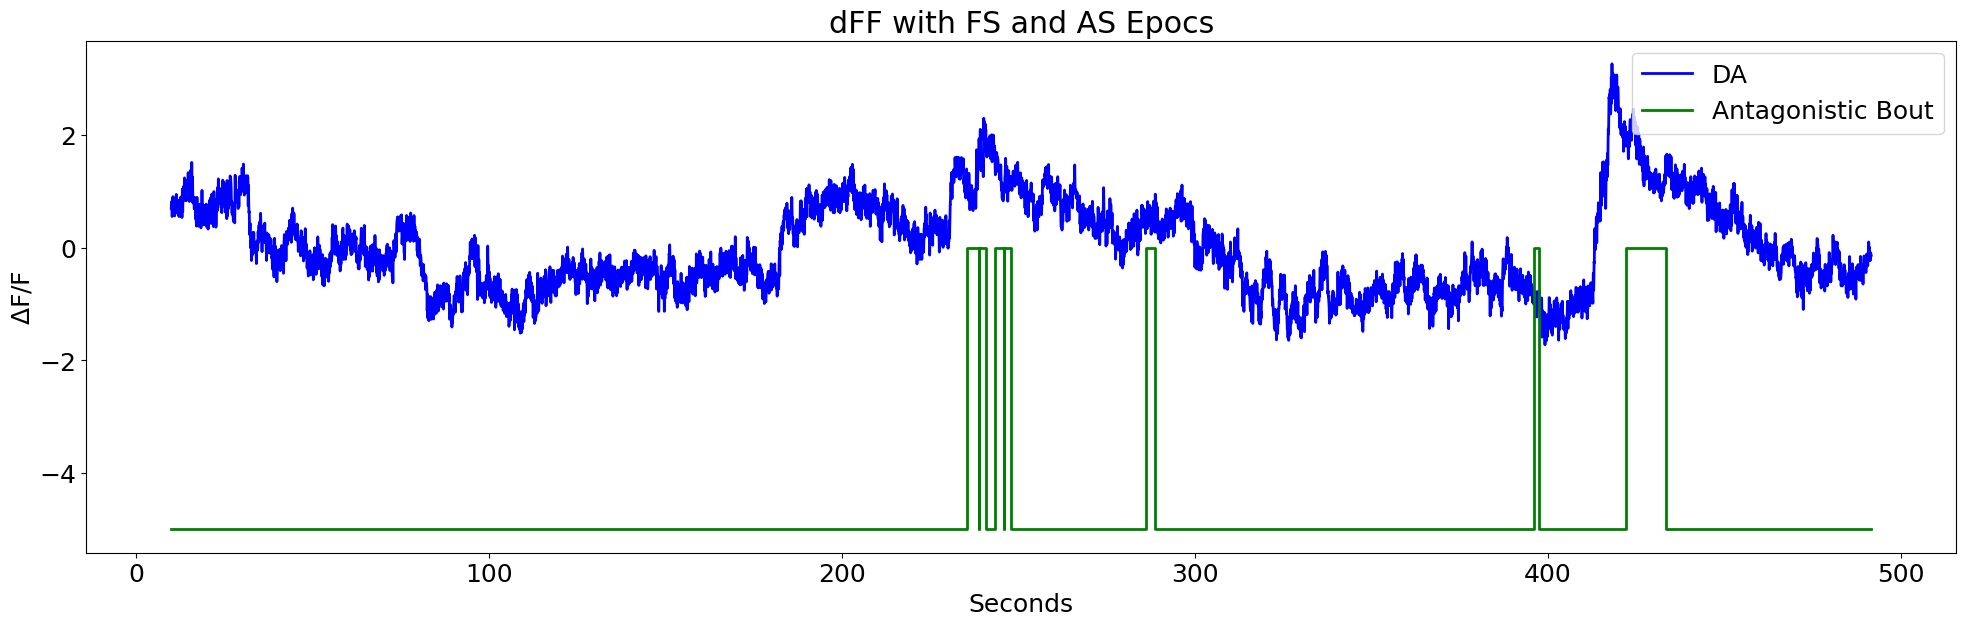

In [14]:
y_scale = 5 #adjust according to data needs
y_shift = -5 #scale and shift are just for aesthetics

# First subplot in a series: dFF with FC epocs
fig2 = plt.figure(figsize=(20,12))
ax2 = fig2.add_subplot(211)

p1, = ax2.plot(NAc_time, dFF, linewidth=2, color='blue', label='DA')
p2, = ax2.plot(FC_EVENT_x, y_scale*FC_EVENT_y+y_shift, linewidth=2, color='green', label='Antagonistic Bout')


ax2.set_ylabel(r'$\Delta$F/F')
ax2.set_xlabel('Seconds')
ax2.set_title('dFF with FS and AS Epocs')
ax2.legend(handles=[p1,p2], loc='upper right')
fig2.tight_layout()

## Combining Close bouts

In [15]:
FC = "FC"
FC_DICT2 = {
        "name":FC,
        "onset":[],
        "offset":[],
        "type_str":NAc_data.epocs.Cam1.type_str,
        "data":[]
        }

NAc_data.epocs.FC = tdt.StructType(FC_DICT2)

FC_on_diff = np.diff(NAc_data.epocs[FC_EVENT].onset)
BOUT_TIME_THRESHOLD = 7.5
FC_diff_ind = np.where(FC_on_diff >= BOUT_TIME_THRESHOLD)[0]
#for some reason np.where returns a 2D array, hence the [0]

# Make an onset/ offset array based on threshold indicies
diff_ind = 0
for ind in FC_diff_ind: 
    # BOUT onset is thresholded onset index of FC epoc event
    NAc_data.epocs[FC].onset.append(NAc_data.epocs[FC_EVENT].onset[diff_ind])
    # BOUT offset is thresholded offset of FC event before next onset
    NAc_data.epocs[FC].offset.append(NAc_data.epocs[FC_EVENT].offset[ind])
    # set the values for data, arbitrary 1
    NAc_data.epocs[FC].data.append(1)
    diff_ind = ind + 1

# special case for last event to handle FC event offset indexing
NAc_data.epocs[FC].onset.append(NAc_data.epocs[FC_EVENT].onset[FC_diff_ind[-1]+1])
NAc_data.epocs[FC].offset.append(NAc_data.epocs[FC_EVENT].offset[-1])
NAc_data.epocs[FC].data.append(1)

# Now determine if it was a 'real' FC bout by thresholding by some
# user-set number of FCs in a row
MIN_FC_THRESH = 1 #1 FCs or more make a bout
FCs_array = []

NAc_data.epocs[FC].onset = np.array(NAc_data.epocs[FC].onset)
NAc_data.epocs[FC].offset = np.array(NAc_data.epocs[FC].offset)

# Find number of FCs in FCs_array between onset and offset of our new FC BOUT FC_EVENT
for on, off in zip(NAc_data.epocs[FC].onset,NAc_data.epocs[FC].offset):
    FCs_array.append(
        len(np.where((NAc_data.epocs[FC_EVENT].onset >= on) & (NAc_data.epocs[FC_EVENT].onset <= off))[0]))

NAc_data.epocs[FC].onset = (NAc_data.epocs[FC].onset).tolist()
NAc_data.epocs[FC].offset = (NAc_data.epocs[FC].offset).tolist()

# Remove onsets, offsets, and data of thrown out events
FCs_array = np.array(FCs_array)
inds = np.where(FCs_array<MIN_FC_THRESH)[0]
for index in sorted(inds, reverse=True):
    del NAc_data.epocs[FC].onset[index]
    del NAc_data.epocs[FC].offset[index]
    del NAc_data.epocs[FC].data[index]



In [16]:
# Make a continuous time series for FC BOUTS for plotting
FC_EVENT_on = NAc_data.epocs[FC].onset
FC_EVENT_off = NAc_data.epocs[FC].offset

FC_EVENT_on

[235.348, 286.126, 396.143, 422.28]

In [18]:
FC_EVENT_x2 = np.append(NAc_time[0], np.append(
    np.reshape(np.kron([FC_EVENT_on, FC_EVENT_off],np.array([[1], [1]])).T, [1,-1])[0], NAc_time[-1]))
sz = len(FC_EVENT_on)
d = NAc_data.epocs[FC].data

FC_EVENT_y2 = np.append(np.append(
    0, np.reshape(np.vstack([np.zeros(sz), d, d, np.zeros(sz)]).T, [1 ,-1])[0]), 0)
print(len(FC_EVENT_y2))
print(len(FC_EVENT_x2))

18
18


In [19]:
print(len(FC_EVENT_y))
print(len(FC_EVENT_x))

print(len(FC_EVENT_y2))
print(len(FC_EVENT_x2))

30
30
18
18


In [20]:
print(FC_EVENT_x)
print(FC_EVENT_x2)

[ 10.00046572 235.348      235.348      238.745      238.745
 238.745      238.745      240.76       240.76       243.293
 243.293      245.826      245.826      245.826      245.826
 248.071      248.071      286.126      286.126      288.601
 288.601      396.143      396.143      397.524      397.524
 422.28       422.28       433.391      433.391      491.61141289]
[ 10.00046572 235.348      235.348      248.071      248.071
 286.126      286.126      288.601      288.601      396.143
 396.143      397.524      397.524      422.28       422.28
 433.391      433.391      491.61141289]


Replot

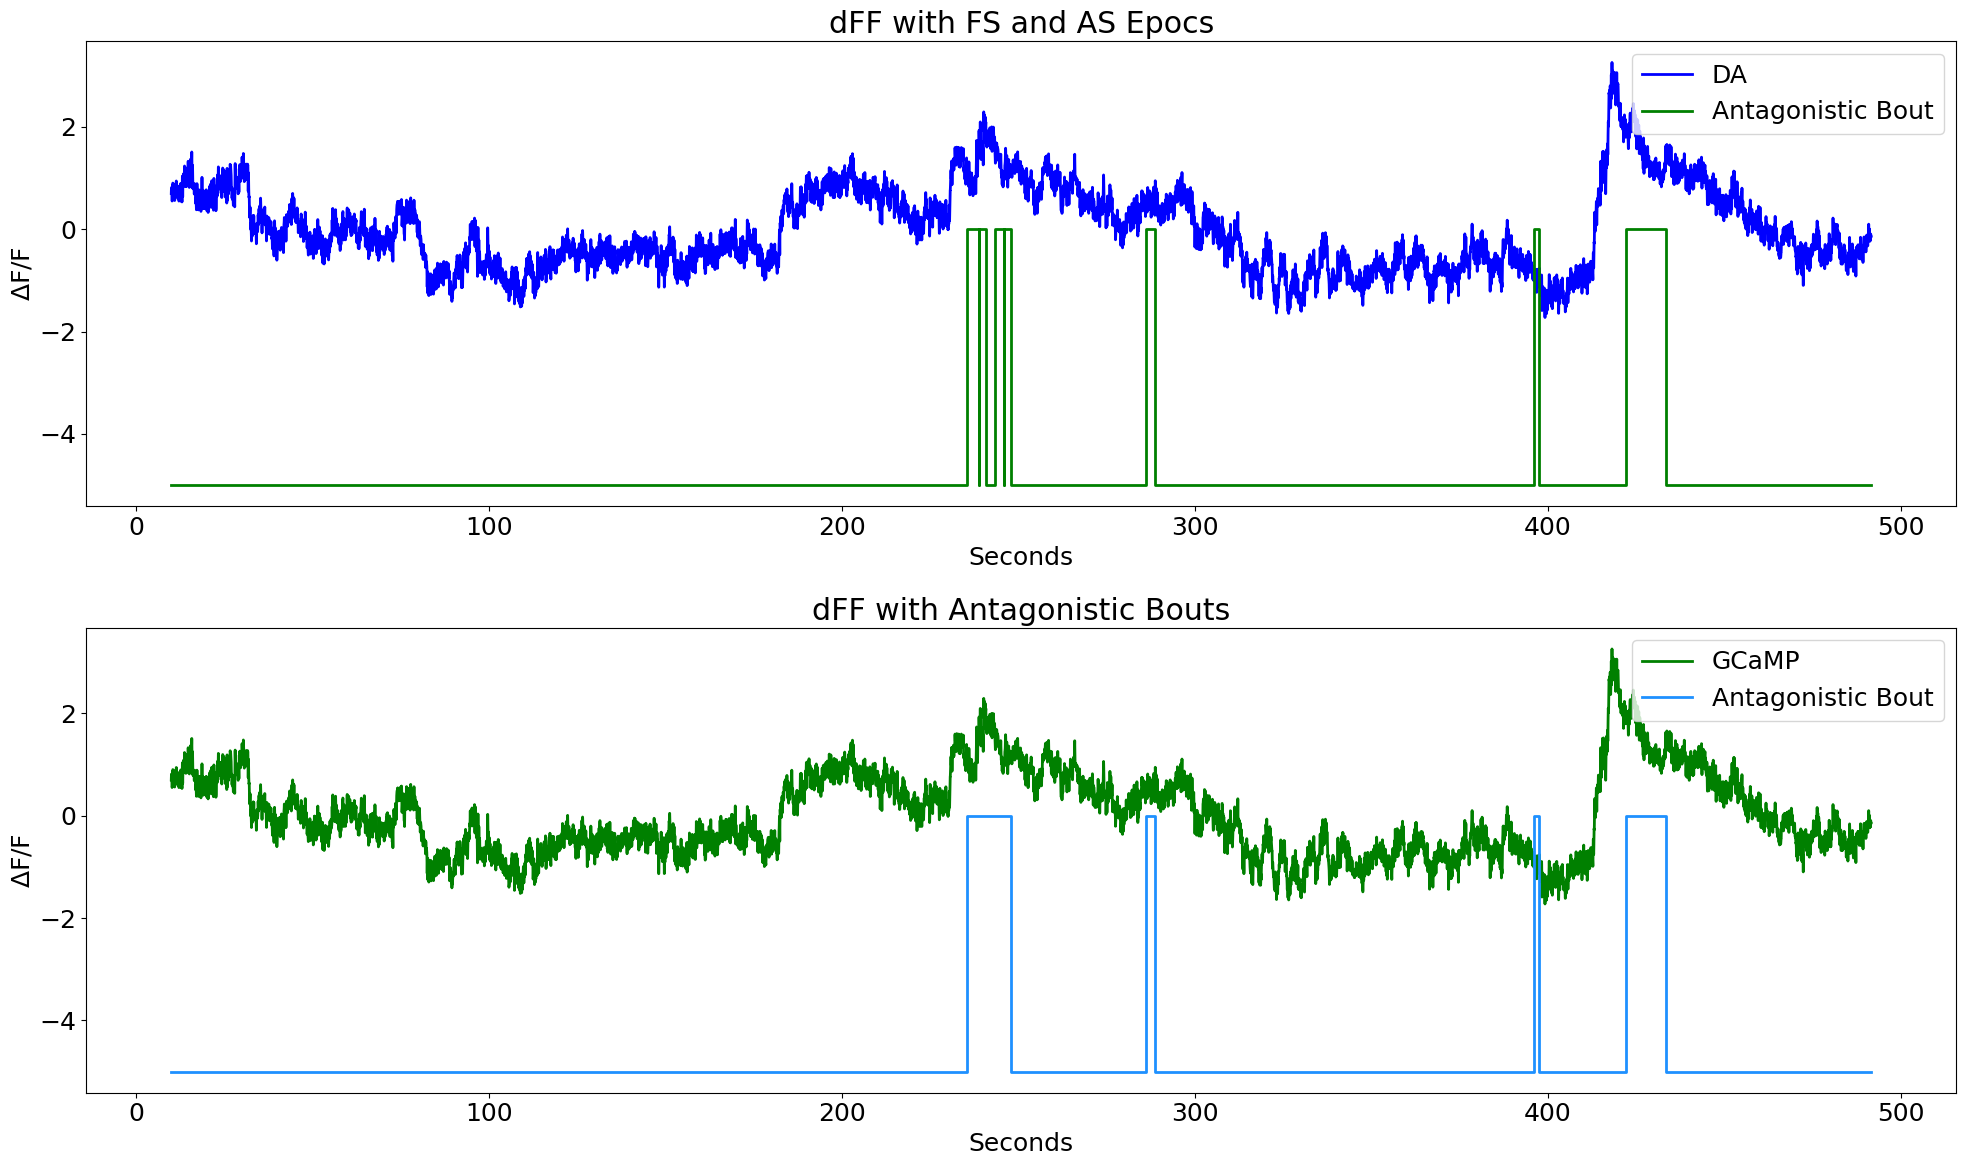

In [21]:
ax3 = fig2.add_subplot(212)
p1, = ax3.plot(NAc_time, dFF, linewidth=2, color='green', label='GCaMP')
p2, = ax3.plot(FC_EVENT_x2, y_scale*FC_EVENT_y2+y_shift, linewidth=2, color='dodgerblue', label='Antagonistic Bout')
ax3.set_ylabel(r'$\Delta$F/F')
ax3.set_xlabel('Seconds')
ax3.set_title('dFF with Antagonistic Bouts')
ax3.legend(handles=[p1, p2], loc='upper right')
fig2.tight_layout()
fig2

### Make nice area fills instead of epocs for aesthetics

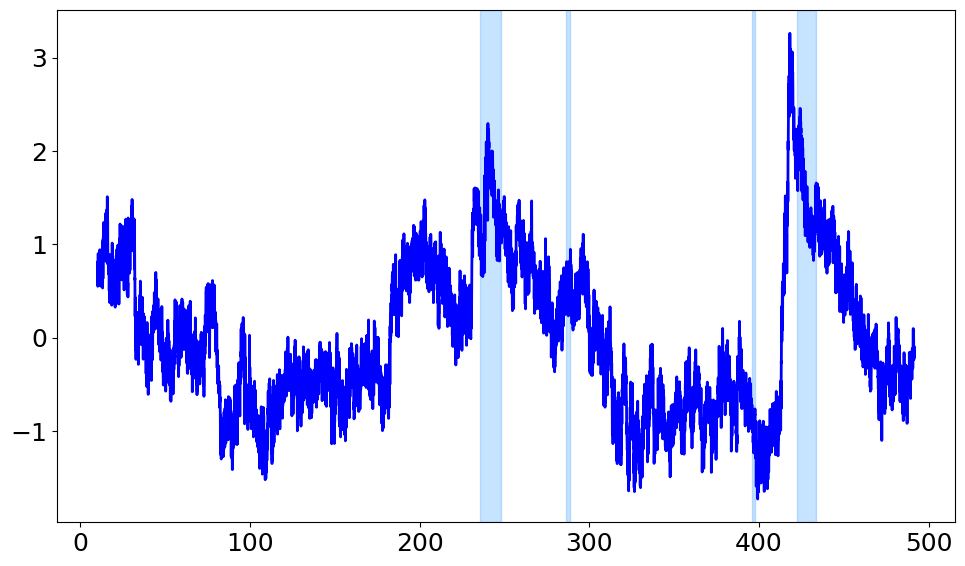

In [29]:
fig4 = plt.figure(figsize=(10,6))
ax5 = fig4.add_subplot(111)

p1, = ax5.plot(NAc_time, dFF,linewidth=2, color='blue', label='DA')
for on, off in zip(NAc_data.epocs[FC].onset, NAc_data.epocs[FC].offset):
    ax5.axvspan(on, off, alpha=0.25, color='dodgerblue')
    
#ax5.set_ylabel(r'$\Delta$F/F')
#ax5.set_xlabel('Seconds')
#ax5.set_title('mPFC - dFF with Antagonistic Bouts')
fig4.tight_layout()
fig4.savefig(r'C:\Users\yongc\Desktop\Photometry\Graph Pictures\mPFC_agonistic_behavior.svg', format='svg')

## Make a Peri-Event Stimulus Plot

In [23]:
PRE_TIME = 5 # five seconds before event onset
POST_TIME = 5 # ten seconds after
fs = NAc_data.streams[DA].fs/N #recall we downsampled by N = 10 earlier

# time span for peri-event filtering, PRE and POST, in samples
TRANGE = [-PRE_TIME*np.floor(fs), POST_TIME*np.floor(fs)]

dFFC_snips = []
array_ind = []
pre_stim = []
post_stim = []

for on in NAc_data.epocs[FC].onset:
    # If the bout cannot include pre-time seconds before event, make zero
    if on < PRE_TIME:
        dFFC_snips.append(np.zeros(TRANGE[1]-TRANGE[0]))
    else: 
        # find first time index after bout onset
        array_ind.append(np.where(NAc_time > on)[0][0])
        # find index corresponding to pre and post stim durations
        pre_stim.append(array_ind[-1] + TRANGE[0])
        post_stim.append(array_ind[-1] + TRANGE[1])
        dFFC_snips.append(dFF[int(pre_stim[-1]):int(post_stim[-1])])

# Make all snippets the same size based on min snippet length
min1 = np.min([np.size(x) for x in dFFC_snips])
dFFC_snips = [x[1:min1] for x in dFFC_snips]

mean_dFFC_snips = np.mean(dFFC_snips, axis=0)
std_dFFC_snips = np.std(mean_dFFC_snips, axis=0)

peri_time = np.linspace(1, len(mean_dFFC_snips), len(mean_dFFC_snips))/fs - PRE_TIME

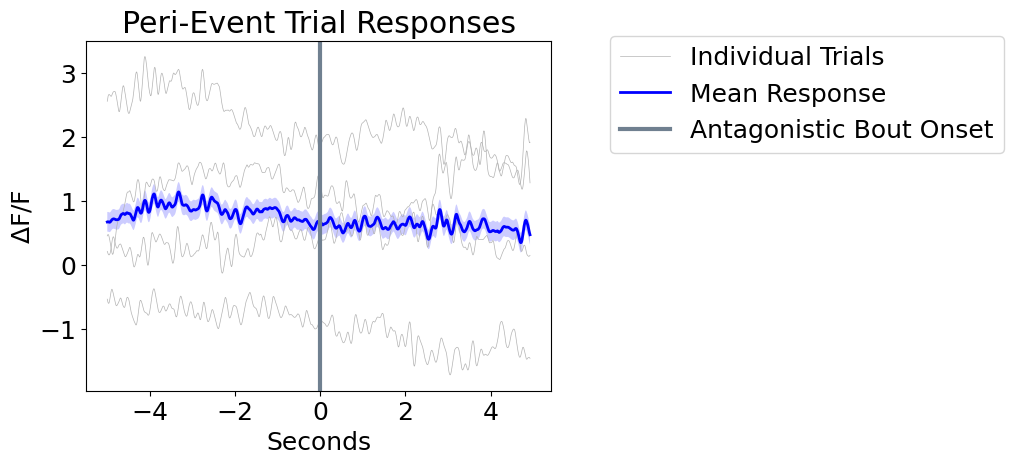

In [24]:
fig5 = plt.figure(figsize=(6,10))
ax6 = fig5.add_subplot(211)

for snip in dFFC_snips:
    p1, = ax6.plot(peri_time, snip, linewidth=.5, color=[.7, .7, .7], label='Individual Trials')
p2, = ax6.plot(peri_time, mean_dFFC_snips, linewidth=2, color='blue', label='Mean Response')

# Plotting standard error bands
p3 = ax6.fill_between(peri_time, mean_dFFC_snips+std_dFFC_snips, 
                      mean_dFFC_snips-std_dFFC_snips, facecolor='blue', alpha=0.2)
p4 = ax6.axvline(x=0, linewidth=3, color='slategray', label='Antagonistic Bout Onset')

ax6.axis('tight')
ax6.set_xlabel('Seconds')
ax6.set_ylabel(r'$\Delta$F/F')
ax6.set_title('Peri-Event Trial Responses')
ax6.legend(handles=[p1, p2, p4], bbox_to_anchor=(1.1, 1.05));